In [83]:
# Handin 1
# C is the inverse of regularization strength; must be a positive float.
# Like in support vector machines, smaller values specify stronger regularization.
# C = 1 / lambda = 1 / 0.1 = 10

In [84]:
# Iris data set
from sklearn.datasets import load_iris

iris = load_iris()
iris_X, iris_y = iris['data'], iris['target']

# There are 3 classes:
#     0 setosa
#     1 versicolour
#     2 virginica
# There are 4 real-valued features -sepal  length and width, petal length and width.

In [85]:
# Voting data set
# There are 2 classes:
#     0 rebublician
#     1 democrate
# There are 16 0 or 1 valued features (different properties of voters)
import pickle as cp
import numpy as np

# load data for voting
voting_X, voting_y = cp.load(open('voting.pickle', 'rb'))

In [86]:
# separate train and test data (80% vs 20%) and shuffle
def get_shuffled_data(X: np.ndarray,
                      y: np.ndarray) -> tuple :
    N, D = X.shape
    N_train = int(0.8 * N)

    shuffler = np.random.permutation(N)

    X_train = X[shuffler[:N_train]]
    y_train = y[shuffler[:N_train]]

    X_test = X[shuffler[N_train:]]
    y_test = y[shuffler[N_train:]]
    
    return X_train, y_train, X_test, y_test


In [87]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# calculate MSE on whole test set using percent_to_train % of training data
def get_test_error(X_train: np.ndarray, y_train: np.ndarray,
                   X_test: np.ndarray, y_test: np.ndarray,
                   percent_to_train: int, log_reg) -> float :
    
    N_train, D = X_train.shape
    N_train_small = int(percent_to_train * 0.01  * N_train)
       
    X_train_small = X_train[:N_train_small]
    y_train_small = y_train[:N_train_small]
    
    log_reg.fit(X_train_small, y_train_small)

    return np.sum(log_reg.predict(X_test) != y_test)

In [93]:
# do rand_perm_cnt random permutations of a train set
# and average out the test error across the runs
# also return training data sizes used for a single run (10%, 20%, ..., 100%)
def get_avg_errors(X: np.ndarray, y: np.ndarray,
                   rand_perm_cnt: int, k_upper_bound: int) :
    lamda = 0.1
    C_reg = 1 / (2 * lamda)
    log_reg = linear_model.LogisticRegression(C = C_reg, fit_intercept = True)
    
    sum_error = np.zeros(k_upper_bound - 1)
    tr_data_sizes = []
    for i in range(rand_perm_cnt):
        X_train, y_train, X_test, y_test = get_shuffled_data(X, y)
        
        # Train 10 classifiers, where the k-th classifier is trained using 10k% of the training data.
        # For each classifier store the classification error on the test set
        for k in range(1, k_upper_bound) :
            sum_error[k - 1] += get_test_error(X_train, y_train, X_test, y_test, k * 10, log_reg)

        if i == 1 :
            N_train, D = X_train.shape
            for k in range(1, k_upper_bound) :
                tr_data_sizes.append(int(N_train * k * 0.1))

    N_test, D = X_test.shape
    sum_error = sum_error / (rand_perm_cnt * N_test)
    
    return sum_error, tr_data_sizes

# voting_avg_errs, voting_tr_data_sizes = get_avg_errors(voting_X, voting_y, 1000, 11)
# print(voting_avg_errs)

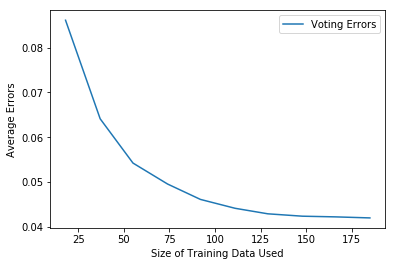

In [94]:
# Handin 2
import matplotlib.pyplot as plt

# get average test errors on voting data
voting_avg_errs, voting_tr_data_sizes = get_avg_errors(voting_X, voting_y, 1000, 11)

# and plot them as a function of the size of the training data.

plt.plot(voting_tr_data_sizes, voting_avg_errs, label = "Voting Errors") 

plt.legend(loc=1)

plt.xlabel('Size of Training Data Used')
plt.ylabel('Average Errors')

plt.show()

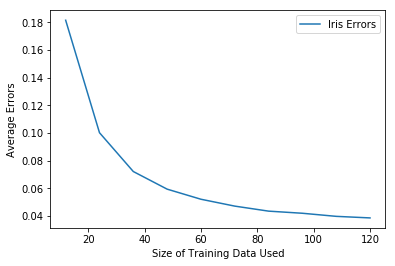

In [95]:
# Handin 2
# get average test errors on voting data
iris_avg_errs, iris_tr_data_sizes = get_avg_errors(iris_X, iris_y, 1000, 11)

# and plot them as a function of the size of the training data.
plt.plot(iris_tr_data_sizes, iris_avg_errs, label = "Iris Errors")

plt.legend(loc=1)

plt.xlabel('Size of Training Data Used')
plt.ylabel('Average Errors')

plt.show()